Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Datasets

In [2]:
from tensorflow.keras.datasets import mnist

Features and Labels

In [3]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

image

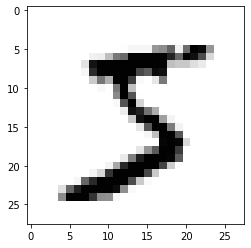

In [6]:
s1 = X_train[0,:,:]
plt.imshow(s1, cmap='Greys')

In [7]:
print(s1.min(),s1.max())

0 255


label

In [8]:
print(y_train[0])

5


In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
# one hot encode target values
y_train = to_categorical(y_train, dtype = 'uint8')
y_test = to_categorical(y_test, dtype = 'uint8')

In [11]:
y_test.shape

(10000, 10)

reshapeing

In [12]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

normalising

In [13]:
# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [14]:
# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
X_train[0,:,:]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

## Model Setup

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10,activation='softmax'))   # number of categories = 10, sigmoid 

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 50)                270450    
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 273,830
Trainable params: 273,830
Non-trainable params: 0
__________________________________________________

## Training

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])   #bce, metrics=['accuracy','categorical_crossentropy']

In [19]:
hist = model.fit(x = X_train, y = y_train, batch_size=16, validation_data=(X_test,y_test), epochs=20,verbose=1)

Epoch 1/20
3750/3750 [==============================] - 14s 4ms/step - loss: 0.1645 - accuracy: 0.9497 - val_loss: 0.0917 - val_accuracy: 0.9719
Epoch 2/20
3750/3750 [==============================] - 13s 3ms/step - loss: 0.0613 - accuracy: 0.9811 - val_loss: 0.0501 - val_accuracy: 0.9841
Epoch 3/20
3750/3750 [==============================] - 13s 4ms/step - loss: 0.0412 - accuracy: 0.9868 - val_loss: 0.0550 - val_accuracy: 0.9829
Epoch 4/20
3750/3750 [==============================] - 13s 3ms/step - loss: 0.0293 - accuracy: 0.9903 - val_loss: 0.0540 - val_accuracy: 0.9840
Epoch 5/20
3750/3750 [==============================] - 13s 3ms/step - loss: 0.0223 - accuracy: 0.9926 - val_loss: 0.0647 - val_accuracy: 0.9826
Epoch 6/20
3750/3750 [==============================] - 13s 4ms/step - loss: 0.0180 - accuracy: 0.9940 - val_loss: 0.0549 - val_accuracy: 0.9845
Epoch 7/20
3750/3750 [==============================] - 13s 3ms/step - loss: 0.0126 - accuracy: 0.9960 - val_loss: 0.0534 - val_ac

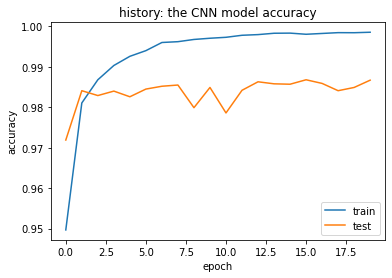

In [20]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('history: the CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

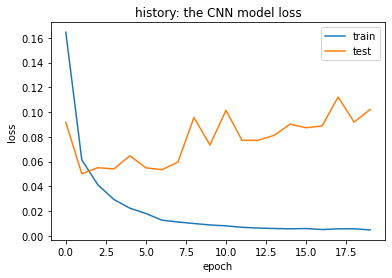

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('history: the CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## Evaluating Model

In [22]:
# evaluate model
_, acc = model.evaluate(X_test,y_test, verbose=0)
print(acc*100)

98.66999983787537


## Predicting on single value

In [23]:
x1 = X_test[0,:,:,:]
x1 = x1.reshape(1,28,28,1)

In [24]:
y1 = model.predict(x1)  

In [25]:
print(np.argmax(y1))  #list value  

7


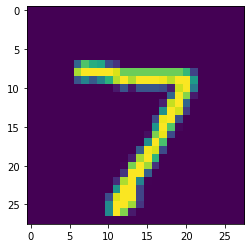

In [26]:
plt.imshow(x1.reshape(28,28,1))

## Save Model

In [27]:
model.save('model123.h5')

save weights only

In [28]:
# model.save_weights('w234.h5')

re load model

In [29]:
from tensorflow.keras.models import load_model

In [30]:
model= load_model('model123.h5')

In [31]:
# model.load_weights('w234.h5')

Exercise

In [32]:
# model.add(BatchNormalization())
# opt = SGD(learning_rate=0.01, momentum=0.9)
# dropout layer